In [481]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [482]:
df = pd.read_csv('/Users/damodargupta/Desktop/ML/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [483]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlations_with_target

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [485]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [486]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [487]:
def not_ready_to_move_tag(row):
    if row['availability'] != "Ready To Move":
        return "not ready to move"
    else:
        return row['availability']

In [488]:
df['availability'] = df.apply(not_ready_to_move_tag , axis=1)

In [489]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,not ready to move,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [490]:
df['availability'].value_counts()

Ready To Move        10581
not ready to move     2739
Name: availability, dtype: int64

<Axes: xlabel='availability', ylabel='price'>

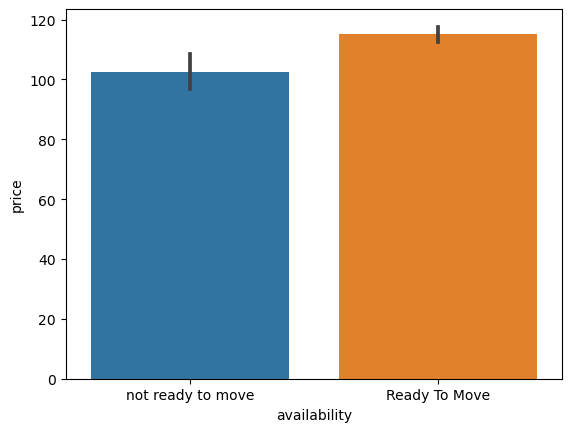

In [491]:
sns.barplot(data=df , x = 'availability' , y='price')

In [492]:
df['availability'] = df['availability'].map({"Ready To Move" : 0 , "not ready to move" : 1})

In [493]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlations_with_target

price           1.000000
bath            0.456345
balcony         0.120355
availability   -0.034483
Name: price, dtype: float64

In [494]:
df['availability'].mode()

0    0
Name: availability, dtype: int64

In [495]:
df['availability'].fillna(0 , inplace=True)

Text(0.5, 0, "{'Carpet  Area': 0, 'Plot  Area': 1, 'Built-up  Area': 2, 'Super built-up  Area': 3}")

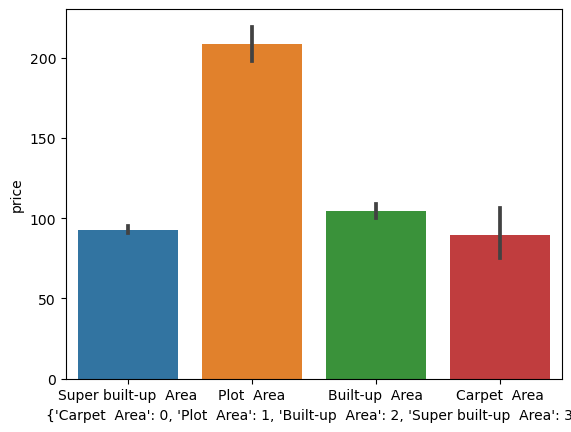

In [496]:
sns.barplot(data = df , x = 'area_type' , y = 'price')
plt.xlabel({"Carpet  Area" : 0 ,  "Plot  Area" : 1 , "Built-up  Area" : 2 , "Super built-up  Area" : 3 ,})

In [497]:
# Calculate the mean price for each location
location_means = df.groupby('location')['price'].mean().to_dict()

# Map the mean prices to the 'location' column
df['location'] = df['location'].map(location_means)

In [498]:
# Calculate the mean price for each location
location_means = df.groupby('society')['price'].mean().to_dict()

# Map the mean prices to the 'location' column
df['society'] = df['society'].map(location_means)

In [499]:
# encoder = LabelEncoder()
# df['location' ] = encoder.fit_transform(df['location' ])
# df['society' ] = encoder.fit_transform(df['society' ])

In [500]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,1,48.316667,2 BHK,53.810000,1056,2.0,1.0,39.07
1,Plot Area,0,115.015882,4 Bedroom,121.615385,2600,5.0,3.0,120.00
2,Built-up Area,0,61.252527,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,0,115.348261,3 BHK,116.895455,1521,3.0,1.0,95.00
4,Super built-up Area,0,95.630303,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,128.012324,5 Bedroom,187.200000,3453,4.0,0.0,231.00
13316,Super built-up Area,0,211.428571,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,0,64.714035,2 BHK,51.000000,1141,2.0,1.0,60.00
13318,Super built-up Area,1,140.631429,4 BHK,279.333333,4689,4.0,1.0,488.00


In [501]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: xlabel='location', ylabel='society'>

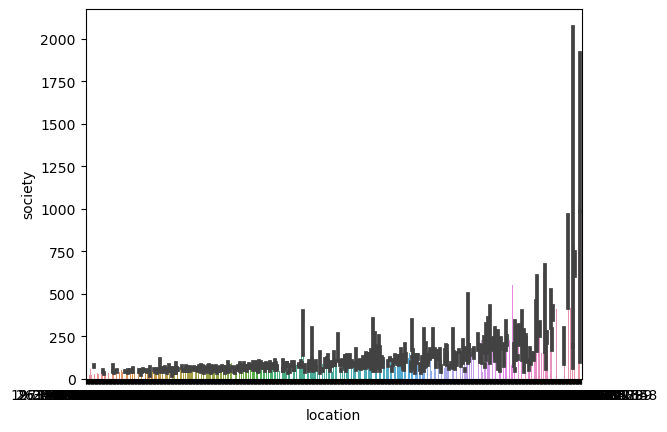

In [502]:
sns.barplot(data =df , x = 'location' , y='society')

In [503]:
df['society'] = df['society'].fillna(df['location'])

In [504]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,1,48.316667,2 BHK,53.810000,1056,2.0,1.0,39.07
1,Plot Area,0,115.015882,4 Bedroom,121.615385,2600,5.0,3.0,120.00
2,Built-up Area,0,61.252527,3 BHK,61.252527,1440,2.0,3.0,62.00
3,Super built-up Area,0,115.348261,3 BHK,116.895455,1521,3.0,1.0,95.00
4,Super built-up Area,0,95.630303,2 BHK,95.630303,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,128.012324,5 Bedroom,187.200000,3453,4.0,0.0,231.00
13316,Super built-up Area,0,211.428571,4 BHK,211.428571,3600,5.0,NaN,400.00
13317,Built-up Area,0,64.714035,2 BHK,51.000000,1141,2.0,1.0,60.00
13318,Super built-up Area,1,140.631429,4 BHK,279.333333,4689,4.0,1.0,488.00


In [505]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlations_with_target

price           1.000000
society         0.760581
location        0.630454
bath            0.456345
balcony         0.120355
availability   -0.034483
Name: price, dtype: float64

In [506]:
df['area_type'] = df['area_type'].map({"Super built-up  Area" : 1 , "Built-up  Area" : 2 , "Plot  Area" : 3 , "Carpet  Area" : 0 })

<Axes: xlabel='area_type', ylabel='price'>

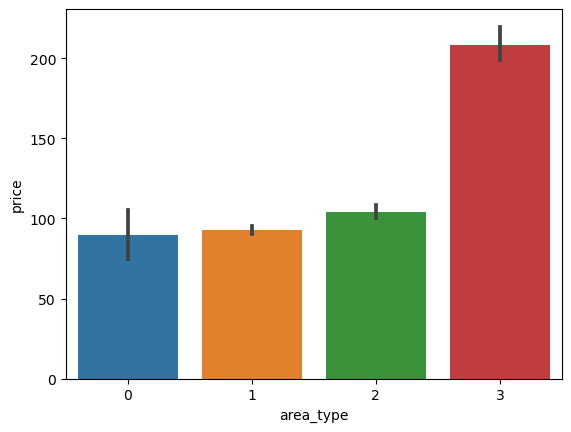

In [507]:
sns.barplot(data = df , x = 'area_type' , y = 'price')

In [508]:
#df.drop(columns=['society'] , inplace=True)

In [509]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,1,48.316667,2 BHK,53.810000,1056,2.0,1.0,39.07
1,3,0,115.015882,4 Bedroom,121.615385,2600,5.0,3.0,120.00
2,2,0,61.252527,3 BHK,61.252527,1440,2.0,3.0,62.00
3,1,0,115.348261,3 BHK,116.895455,1521,3.0,1.0,95.00
4,1,0,95.630303,2 BHK,95.630303,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,2,0,128.012324,5 Bedroom,187.200000,3453,4.0,0.0,231.00
13316,1,0,211.428571,4 BHK,211.428571,3600,5.0,NaN,400.00
13317,2,0,64.714035,2 BHK,51.000000,1141,2.0,1.0,60.00
13318,1,1,140.631429,4 BHK,279.333333,4689,4.0,1.0,488.00


In [510]:
def split_size(row):
    size = row['size']
    if isinstance(size, str):  # Check if 'size' is a string
        return size.split(' ')[0]
    else:
        return None  # Return a default value for missing values

In [511]:
df['size_new'] = df.apply(split_size , axis=1)

In [512]:
df.drop(columns=['size'] , inplace=True)

In [513]:
print(df['size_new'].mode())
print(df['balcony'].mode())
print(df['bath'].mode())

0    2
Name: size_new, dtype: object
0    2.0
Name: balcony, dtype: float64
0    2.0
Name: bath, dtype: float64


### mode of balcony is 2
### mode of bath is 2
### mode of size is 2

In [514]:
df['size_new'].fillna(2 , inplace=True)
df['balcony'].fillna(2 , inplace=True)
df['bath'].fillna(2 , inplace=True)


In [515]:
# Drop rows where 'location' is null
df = df.dropna(subset=['location'])

In [516]:
df.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
size_new        0
dtype: int64

In [517]:
import re

# Process 'total_sqft' column to handle ranges
def process_total_sqft(total_sqft):
    if ' - ' in total_sqft:  # Check for a range
        range_parts = total_sqft.split(' - ')
        lower = float(range_parts[0])
        upper = float(range_parts[1])
        return (lower + upper) / 2  # Average of the range
    
    elif re.search(r'\d+', total_sqft):
        return float(re.search(r'\d+', total_sqft).group())
    
    else:
        return float(total_sqft.split(' ')[0])  # Single value

df['total_sqft'] = df['total_sqft'].apply(process_total_sqft)

In [518]:
df['size_new'] = df['size_new'].astype('int64')

In [519]:
df['total_sqft'] = df['total_sqft'].astype('float16')

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  int64  
 1   availability  13319 non-null  int64  
 2   location      13319 non-null  float64
 3   society       13319 non-null  float64
 4   total_sqft    13319 non-null  float16
 5   bath          13319 non-null  float64
 6   balcony       13319 non-null  float64
 7   price         13319 non-null  float64
 8   size_new      13319 non-null  int64  
dtypes: float16(1), float64(5), int64(3)
memory usage: 962.5 KB


In [521]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,size_new
0,1,1,48.316667,53.810000,1056.0,2.0,1.0,39.07,2
1,3,0,115.015882,121.615385,2600.0,5.0,3.0,120.00,4
2,2,0,61.252527,61.252527,1440.0,2.0,3.0,62.00,3
3,1,0,115.348261,116.895455,1521.0,3.0,1.0,95.00,3
4,1,0,95.630303,95.630303,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,2,0,128.012324,187.200000,3452.0,4.0,0.0,231.00,5
13316,1,0,211.428571,211.428571,3600.0,5.0,2.0,400.00,4
13317,2,0,64.714035,51.000000,1141.0,2.0,1.0,60.00,2
13318,1,1,140.631429,279.333333,4688.0,4.0,1.0,488.00,4


In [522]:
df['availability'].value_counts()

0    10580
1     2739
Name: availability, dtype: int64

<Axes: xlabel='society'>

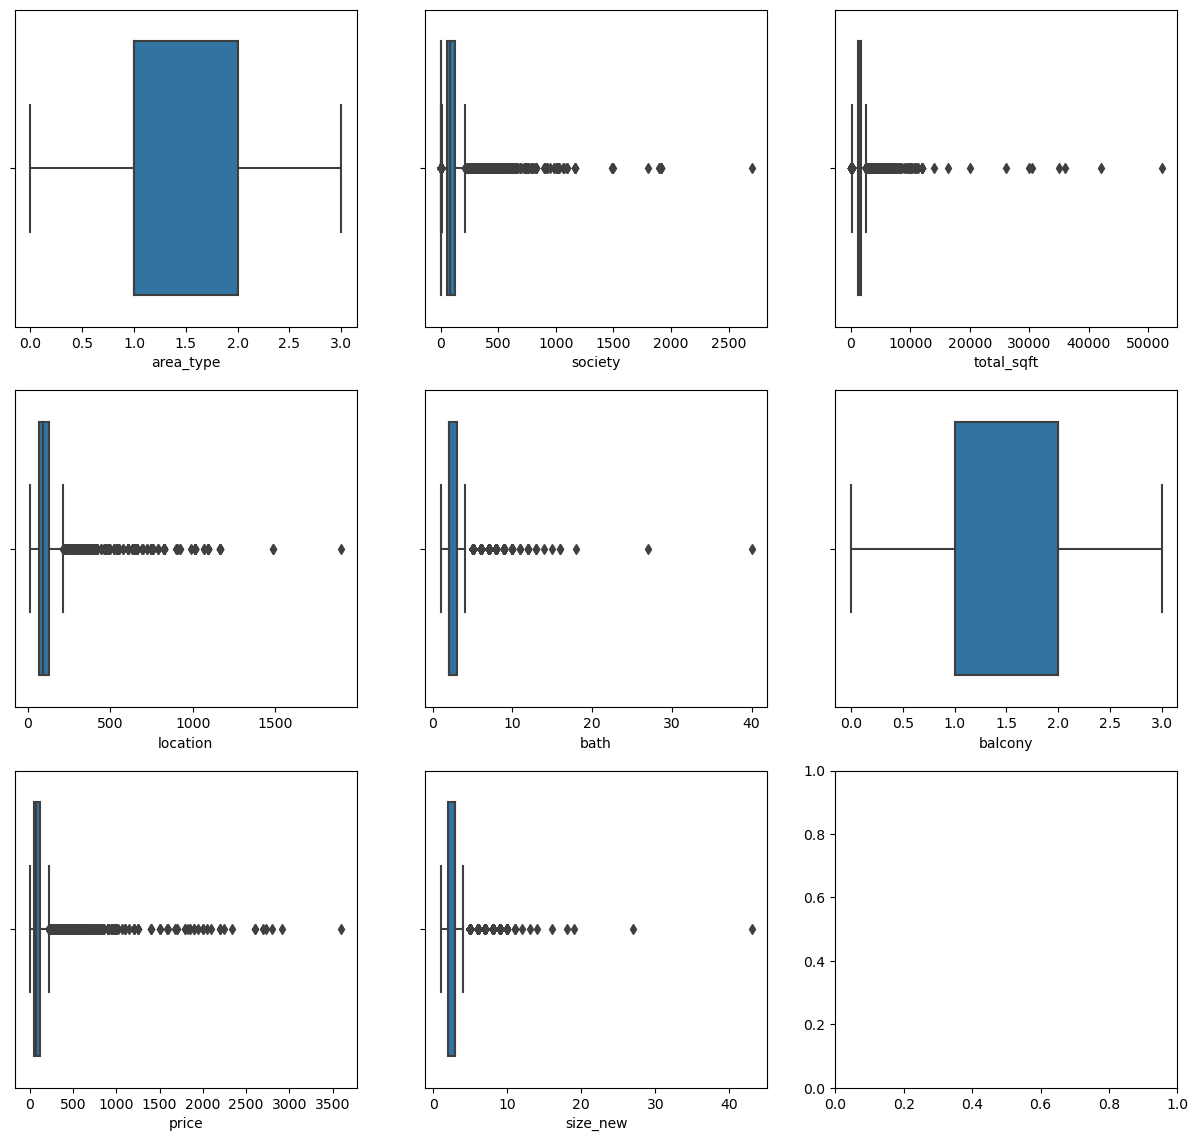

In [523]:
figure = plt.subplots(3 , 3 , figsize = (15,14))
plt.subplot(331)
sns.boxplot(data=df,  x='area_type' )
plt.subplot(332)
sns.boxplot(data=df,  x='availability'  )
plt.subplot(333)
sns.boxplot(data=df,  x='total_sqft' )
plt.subplot(334)
sns.boxplot(data=df,  x='location'  )
plt.subplot(335)
sns.boxplot(data=df,  x='bath' )
plt.subplot(336)
sns.boxplot(data=df,  x='balcony' )
plt.subplot(337)
sns.boxplot(data=df,  x='price')
plt.subplot(338)
sns.boxplot(data=df,  x='size_new' )
plt.subplot(332)
sns.boxplot(data=df,  x='society'  )

In [524]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlations_with_target


price           1.000000
society         0.760581
location        0.630454
total_sqft      0.573382
bath            0.454453
size_new        0.398076
area_type       0.248040
balcony         0.124959
availability   -0.034490
Name: price, dtype: float64

<Axes: >

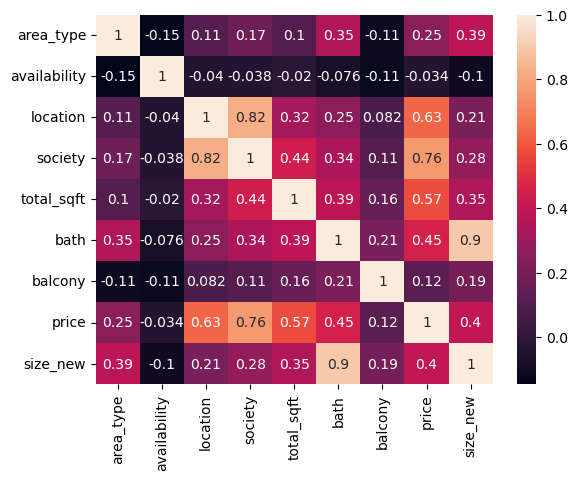

In [525]:
correlation = df.corr()
sns.heatmap(correlation , annot=True)

In [526]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,size_new
0,1,1,48.316667,53.810000,1056.0,2.0,1.0,39.07,2
1,3,0,115.015882,121.615385,2600.0,5.0,3.0,120.00,4
2,2,0,61.252527,61.252527,1440.0,2.0,3.0,62.00,3
3,1,0,115.348261,116.895455,1521.0,3.0,1.0,95.00,3
4,1,0,95.630303,95.630303,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,2,0,128.012324,187.200000,3452.0,4.0,0.0,231.00,5
13316,1,0,211.428571,211.428571,3600.0,5.0,2.0,400.00,4
13317,2,0,64.714035,51.000000,1141.0,2.0,1.0,60.00,2
13318,1,1,140.631429,279.333333,4688.0,4.0,1.0,488.00,4


In [527]:
#df.drop(columns=['location'  , 'availability'] , inplace=True)

In [528]:
# Separate features and labels
X = df.drop(columns=['price'])  # Features
y = df[['price']]  # Labels

In [529]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,size_new
0,1,1,48.316667,53.810000,1056.0,2.0,1.0,39.07,2
1,3,0,115.015882,121.615385,2600.0,5.0,3.0,120.00,4
2,2,0,61.252527,61.252527,1440.0,2.0,3.0,62.00,3
3,1,0,115.348261,116.895455,1521.0,3.0,1.0,95.00,3
4,1,0,95.630303,95.630303,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,2,0,128.012324,187.200000,3452.0,4.0,0.0,231.00,5
13316,1,0,211.428571,211.428571,3600.0,5.0,2.0,400.00,4
13317,2,0,64.714035,51.000000,1141.0,2.0,1.0,60.00,2
13318,1,1,140.631429,279.333333,4688.0,4.0,1.0,488.00,4


In [530]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlations_with_target

price           1.000000
society         0.760581
location        0.630454
total_sqft      0.573382
bath            0.454453
size_new        0.398076
area_type       0.248040
balcony         0.124959
availability   -0.034490
Name: price, dtype: float64

In [531]:
df.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
size_new        0
dtype: int64

In [532]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [533]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

In [534]:
classifier = SVR(kernel='linear')

In [535]:
model = classifier.fit(X_train , y_train)
model

SVR(kernel='linear')

In [536]:
y_pred = model.predict(X_test)
y_pred

array([  2.44119809,  58.37177707,  46.23441729, ...,  68.48419194,
       102.30182073,  47.02411195])

In [537]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6594073594840079

In [538]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# question 1

In regression problems, you face a choice between two loss functions: mean squared error (MSE) and mean absolute error (MAE).As the illustration demonstrates, mean squared error exhibits #faster_convergence (for ranges beyond 1) thanks to its error amplification that accelerates minimizing 🚀.

That is a nice feature, but not always.
Imagine a scenario where your data contains #outliers. In such cases, your model should learn to ignore them. However, MSE magnifies their impact, leading to compromised performance on normal data. 😓

Conversely, mean absolute error treats all errors equally, offering inherent #robustness to outliers.

Thus the best metric for this dataset is MEAN ABSOLUTE ERROR (MAE).

In [539]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6849.911351100157
28.624842866726237
82.7641912369121


# QUESTION 2

If your primary goal is to predict the actual price of a house as accurately as possible, then Mean Squared Error (MSE) would be the more appropriate evaluation metric for your SVM regression model. Here's why:

1. **MSE Measures Accuracy of Predictions**: MSE quantifies the average of the squared differences between the predicted and actual house prices. It provides a direct measure of prediction accuracy by assessing how close your predictions are to the actual prices. Lower MSE values indicate better accuracy.

2. **Penalizes Larger Errors**: MSE penalizes larger prediction errors more heavily than smaller errors. This is important in the context of predicting house prices because you want to ensure that your model minimizes significant deviations from the true prices, which could have a substantial impact on real estate transactions.

3. **Commonly Used in Regression**: MSE is one of the most widely used regression metrics and is the default metric for many regression algorithms. It aligns with the common objective of regression tasks, which is to minimize the discrepancy between predicted and actual values.

On the other hand, R-squared (R²) measures the proportion of variance in the target variable that is explained by your model. While R² provides insight into how well the model fits the data, it doesn't directly measure prediction accuracy or the magnitude of prediction errors. A high R² value doesn't guarantee that your predictions are close to the actual prices, and it may not be the most suitable metric if your primary goal is accurate price prediction.

In summary, when your primary goal is to predict house prices as accurately as possible, it's advisable to use Mean Squared Error (MSE) as the evaluation metric for your SVM regression model. This metric focuses on the accuracy and precision of your predictions, which is essential in real estate and similar domains where small prediction errors can have significant financial implications.

# question 3

When you have a dataset with a significant number of outliers and you want to select an appropriate regression metric to use with your SVM model, the **Mean Absolute Error (MAE)** metric can be the most appropriate choice. Here's why:

1. **Robustness to Outliers**: MAE is less sensitive to outliers compared to other metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Outliers can have a disproportionately large impact on MSE and RMSE because they involve squaring the error terms. In contrast, MAE simply takes the absolute difference between the predicted and actual values, which makes it more robust to extreme values.

2. **Realistic Assessment of Error**: MAE provides a realistic assessment of the magnitude of errors in your predictions, which is important when dealing with outlier-rich datasets. It measures the average absolute difference between predicted and actual values, giving you a clear sense of how far off your predictions are, regardless of whether those differences are due to outliers or not.

3. **Interpretability**: MAE is easy to interpret because it represents the average absolute error in the same units as the target variable. This makes it particularly useful when explaining model performance to stakeholders or decision-makers.

4. **Practical Considerations**: In many real-world scenarios where outliers are common (e.g., finance, environmental monitoring, anomaly detection), minimizing the impact of extreme values on your metric is a practical consideration.

While MAE is a good choice for handling datasets with outliers, it's important to note that there is no one-size-fits-all metric. Depending on the specific goals of your regression task and the nature of your dataset, you may still want to consider other metrics like MSE, RMSE, or Huber loss, and you should also explore robust regression techniques or outlier detection methods as part of your modeling process to mitigate the impact of outliers.

# question 4

When you have built an SVM regression model using a polynomial kernel and both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are very close in value, it suggests that the choice of metric may not significantly affect your evaluation. In such cases, you can choose either MSE or RMSE based on your preference and the interpretability of the metric. Here are some considerations for choosing between them:

1. **MSE (Mean Squared Error)**:
   - It measures the average of the squared differences between predicted and actual values.
   - MSE is commonly used in regression tasks and is widely understood.
   - Since RMSE is the square root of MSE, it shares the same unit as the target variable, which may be preferable in some cases.

2. **RMSE (Root Mean Squared Error)**:
   - It is the square root of MSE and has the same units as the target variable.
   - RMSE provides a measure of the average magnitude of errors in the same units as the target, which can be more interpretable.
   - It tends to give more weight to larger errors compared to MSE due to the square root operation, which might be relevant if you want to emphasize the impact of larger errors.

Ultimately, the choice between MSE and RMSE in this scenario may come down to personal preference and the ease of interpretation for your specific use case. Since the values of both metrics are very close, it suggests that your SVM regression model is performing consistently, and the choice of metric is less critical.

You can consider factors such as whether you prefer the metric to be in the same units as the target variable (RMSE) or whether you are more comfortable with the traditional MSE, which is widely used in regression evaluation. In practice, both metrics provide similar insights into the model's performance when they yield closely related values.

# question 5

When your goal is to measure how well an SVM regression model explains the variance in the target variable, the most appropriate evaluation metric to consider is the **coefficient of determination**, commonly known as **R-squared (R²)**.

Here's why R-squared is suitable for this purpose:

1. **Measures Explained Variance**: R-squared quantifies the proportion of the total variance in the target variable that is explained by your model. It provides insight into how well the model fits the data and how much of the variability in the target variable is accounted for by your predictors.

2. **Interpretability**: R-squared is easy to interpret, and its value ranges from 0 to 1. A value of 1 indicates that your model perfectly explains all the variance in the target variable, while a value of 0 indicates that the model doesn't explain any variance beyond the mean of the target variable.

3. **Comparison Across Models**: R-squared allows you to compare the explanatory power of different models. A higher R-squared value generally indicates a better fit and a model that explains more variance.

However, it's important to note that R-squared has limitations:

- It doesn't provide information about the magnitude or direction of prediction errors.
- A high R-squared doesn't necessarily mean that your model's predictions are accurate; it only means that the model explains a large proportion of the variance.
- It can be artificially inflated by adding more predictors to the model, even if they are not meaningful.

While R-squared is valuable for understanding the explained variance, it should be used in conjunction with other evaluation metrics (such as Mean Absolute Error, Mean Squared Error, or Root Mean Squared Error) to gain a comprehensive view of your SVM regression model's performance.

In summary, when your goal is to measure how well your SVM regression model explains the variance in the target variable, R-squared (R²) is a suitable evaluation metric to consider.

# HYPERPARAMETER TUNING

In [540]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon' : [0.1,0.2,0.3]
              }

In [541]:
grid = GridSearchCV(estimator = model , param_grid=param_grid , refit=True , cv=5 , verbose=3)

In [542]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.662 total time=   1.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.590 total time=   0.9s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.545 total time=   0.9s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.9s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.621 total time=   0.9s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.662 total time=   0.9s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.590 total time=   0.9s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.545 total time=   0.9s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.9s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.621 total time=   0.9s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [543]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [550]:
model = SVR(kernel = 'linear' , C = 1000 , gamma = 0.001 , epsilon=0.3 )
model.fit(X_train , y_train)

SVR(C=1000, epsilon=0.3, gamma=0.001, kernel='linear')

In [551]:
## Prediction
y_pred=model.predict(X_test)

In [552]:
## Prediction
from sklearn.metrics import r2_score
r2_score(y_true= y_test , y_pred = y_pred)

0.660994024245056